In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
##for dirname, _, filenames in os.walk('/kaggle/input'):
   ## for filename in filenames:
       ## print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import itertools 
import re
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import numpy as np

In [10]:
train_dir = '/kaggle/input/dog-breed-identification-data/train'
test_dir ='/kaggle/input/dog-breed-identification-data/test'

In [11]:
def append_ext(fn):
    return fn+".jpg"
traindf = pd.read_csv('/kaggle/input/dog-breed-identification-data/labels.csv',dtype=str)
testdf = pd.read_csv('/kaggle/input/dog-breed-identification-data/sample_submission.csv',dtype=str)
traindf["id"] = traindf["id"].apply(append_ext)
testdf["id"] = testdf["id"].apply(append_ext)

In [12]:
traindf.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07.jpg       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg             dingo
2  001cdf01b096e06d78e9e5112d419397.jpg          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d.jpg          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62.jpg  golden_retriever

In [13]:
traindf.shape


(10222, 2)

In [14]:
testdf.head()

id        affenpinscher  \
0  000621fb3cbb32d8935728e48679680e.jpg  0.00833333333333333   
1  00102ee9d8eb90812350685311fe5890.jpg  0.00833333333333333   
2  0012a730dfa437f5f3613fb75efcd4ce.jpg  0.00833333333333333   
3  001510bc8570bbeee98c8d80c8a95ec1.jpg  0.00833333333333333   
4  001a5f3114548acdefa3d4da05474c2e.jpg  0.00833333333333333   

          afghan_hound  african_hunting_dog             airedale  \
0  0.00833333333333333  0.00833333333333333  0.00833333333333333   
1  0.00833333333333333  0.00833333333333333  0.00833333333333333   
2  0.00833333333333333  0.00833333333333333  0.00833333333333333   
3  0.00833333333333333  0.00833333333333333  0.00833333333333333   
4  0.00833333333333333  0.00833333333333333  0.00833333333333333   

  american_staffordshire_terrier          appenzeller   australian_terrier  \
0            0.00833333333333333  0.00833333333333333  0.00833333333333333   
1            0.00833333333333333  0.00833333333333333  0.00833333333333333   
2            0.00833333333333333  0.00833333333333333  0.00833333333333333   
3            0.00833333333333333  0.00833333333333333  0.00833333333333333   
4            0.00833333333333333  0.00833333333333333  0.00833333333333333   

               basenji               basset  ...           toy_poodle  \
0  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
1  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
2  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
3  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
4  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   

           toy_terrier               vizsla         walker_hound  \
0  0.00833333333333333  0.00833333333333333  0.00833333333333333   
1  0.00833333333333333  0.00833333333333333  0.00833333333333333   
2  0.00833333333333333  0.00833333333333333  0.00833333333333333   
3  0.00833333333333333  0.00833333333333333  0.00833333333333333   
4  0.00833333333333333  0.00833333333333333  0.00833333333333333   

            weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0  0.00833333333333333    0.00833333333333333         0.00833333333333333   
1  0.00833333333333333    0.00833333333333333         0.00833333333333333   
2  0.00833333333333333    0.00833333333333333         0.00833333333333333   
3  0.00833333333333333    0.00833333333333333         0.00833333333333333   
4  0.00833333333333333    0.00833333333333333         0.00833333333333333   

               whippet wire-haired_fox_terrier    yorkshire_terrier  
0  0.00833333333333333     0.00833333333333333  0.00833333333333333  
1  0.00833333333333333     0.00833333333333333  0.00833333333333333  
2  0.00833333333333333     0.00833333333333333  0.00833333333333333  
3  0.00833333333333333     0.00833333333333333  0.00833333333333333  
4  0.00833333333333333     0.00833333333333333  0.00833333333333333  

[5 rows x 121 columns]

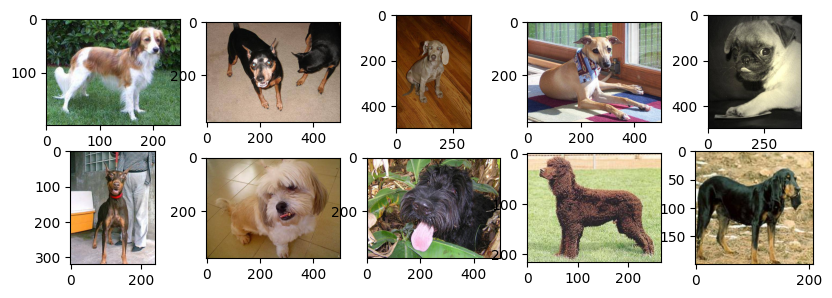

In [15]:
path = "/kaggle/input/dog-breed-identification-data/train"
sub_class = os.listdir(path)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:10])):
    plt.subplot(3,5,e+1)
    img = plt.imread(os.path.join(path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))


In [16]:
train_datagen=ImageDataGenerator( rescale=1./255.,
                                  #rotation_range = 20,
                                  #brightness_range=[0.2,1.0],
                                  #width_shift_range = 0.2,
                                  #height_shift_range = 0.2,
                                  #shear_range = 0.2,
                                  #zoom_range = [0.7,1],
                                  horizontal_flip = True,
                                  #Setting validation split to 2% 
                                  validation_split=0.1 
                                  )

In [17]:
BATCH_SIZE = 32
image_size=(299,299)

train_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="training",
batch_size=BATCH_SIZE,
seed=30,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb" 
)

Found 9200 validated image filenames belonging to 120 classes.


In [18]:
x,y = next(train_generator)
print(type(x))
print(x.shape)
print(y.shape)


<class 'numpy.ndarray'>
(32, 299, 299, 3)
(32, 120)


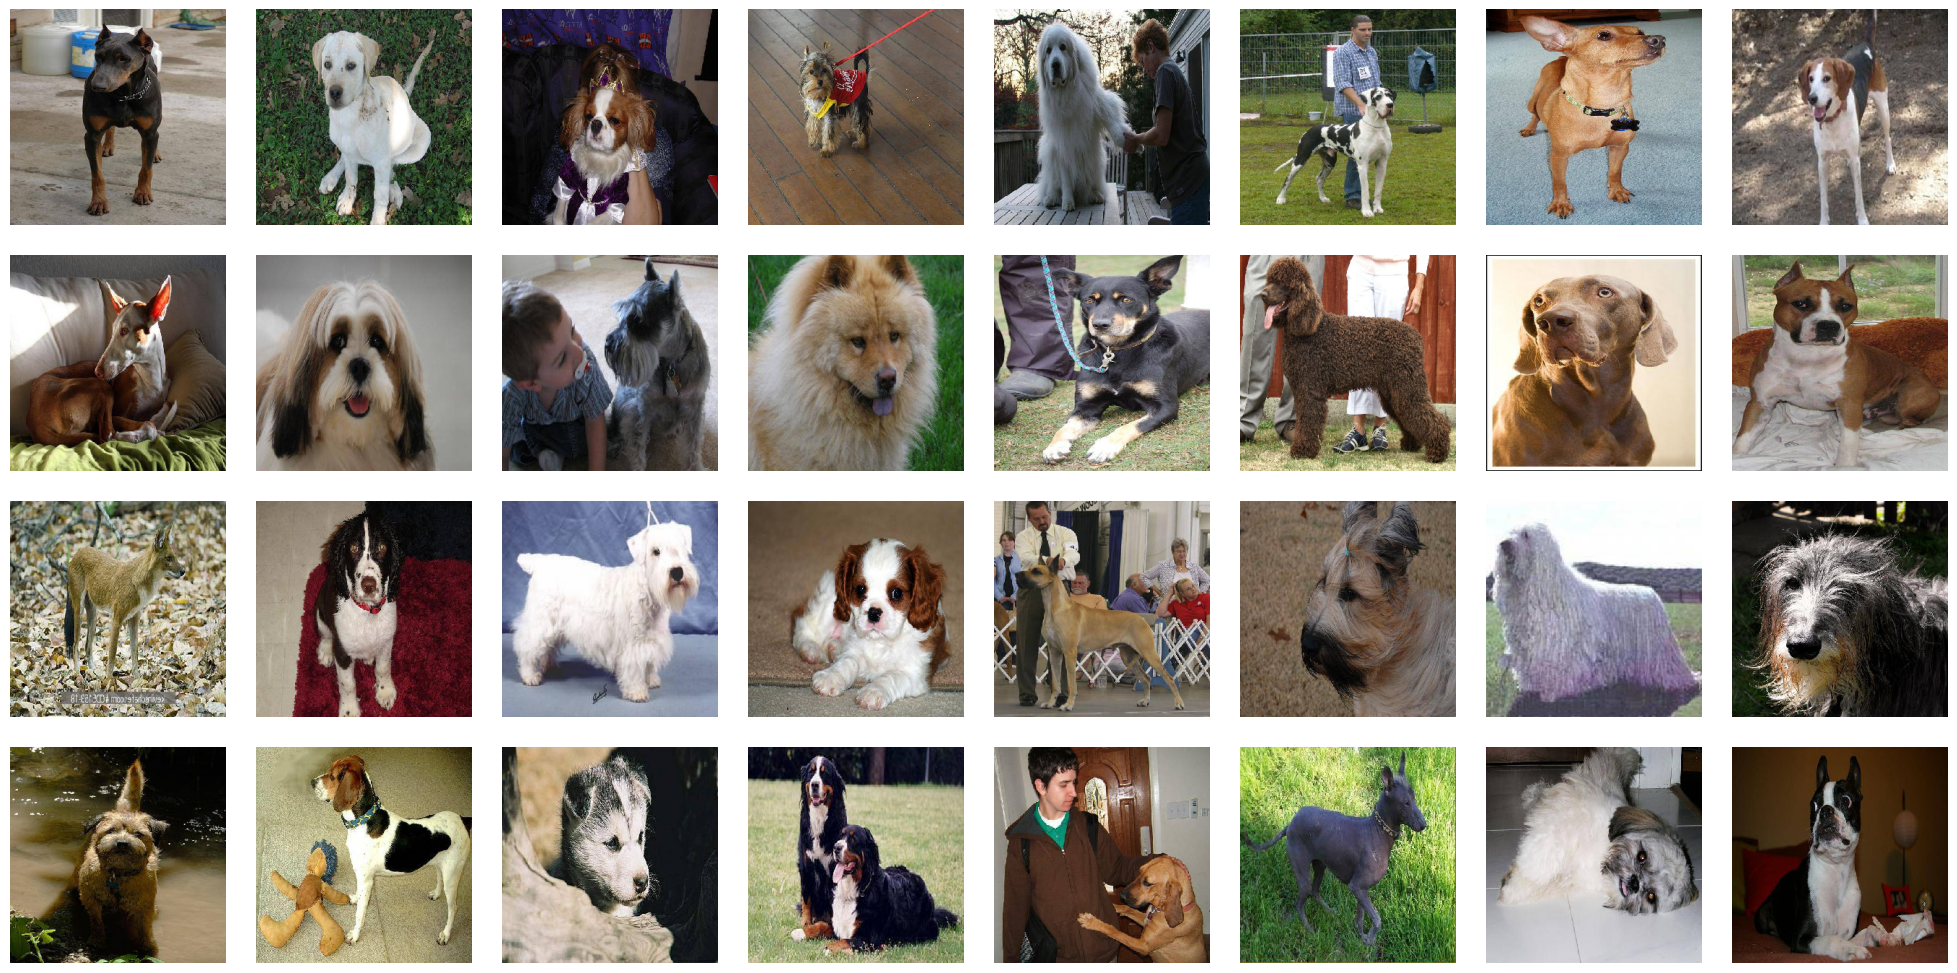

In [20]:


def show_grid(image_list,nrows,ncols,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        

        show_grid(x,4,8,figsize=(25,25))




In [21]:


valid_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="validation",
batch_size=BATCH_SIZE,
seed=30,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb")



Found 1022 validated image filenames belonging to 120 classes.


In [22]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory=test_dir,
x_col="id",
y_col=None,
batch_size=BATCH_SIZE,
seed=30,
shuffle=False,
class_mode=None,
target_size=image_size,
color_mode="rgb")

Found 10357 validated image filenames.


In [24]:
shape=[299,299,3]

base_model = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
base_model.trainable = False
    
model = tf.keras.Sequential([ 
        base_model,   
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(120, activation='softmax')
    ])



In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(optimizer = opt ,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               30840     
                                                                 
Total params: 22358168 (85.29 MB)
Trainable params: 555384 (2.12 MB)
Non-trainable params: 21802784 (83.17 MB)
_________

In [26]:
reduce = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',factor=0.2,patience=5, min_lr=0.001 )

early = tf.keras.callbacks.EarlyStopping( patience=2,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [28]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks=[early],)

model.save('/kaggle/working/inceptionv3_finetuned.h5')


Epoch 1/10
287/287 [==============================] - 71s 245ms/step - loss: 0.7079 - accuracy: 0.8087 - val_loss: 0.4542 - val_accuracy: 0.8700
Epoch 2/10
287/287 [==============================] - 52s 181ms/step - loss: 0.5352 - accuracy: 0.8412 - val_loss: 0.4011 - val_accuracy: 0.8800
Epoch 3/10
287/287 [==============================] - 49s 170ms/step - loss: 0.4671 - accuracy: 0.8550 - val_loss: 0.4219 - val_accuracy: 0.8690
Epoch 4/10
287/287 [==============================] - 53s 183ms/step - loss: 0.4017 - accuracy: 0.8733 - val_loss: 0.3577 - val_accuracy: 0.8901
Epoch 5/10
287/287 [==============================] - 52s 182ms/step - loss: 0.3774 - accuracy: 0.8830 - val_loss: 0.3806 - val_accuracy: 0.8790
Epoch 6/10
287/287 [==============================] - 53s 184ms/step - loss: 0.3354 - accuracy: 0.8928 - val_loss: 0.3851 - val_accuracy: 0.8841


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
from IPython.display import FileLink

# Replace 'my_trained_model.h5' with your actual model file name
output_path = r'/kaggle/working/inceptionv3_finetuned.pickle'

# Create a download link
FileLink(r'./' + output_path.split('/')[-1])

/kaggle/working/inceptionv3_finetuned.pickle

In [30]:
import pickle

# Save the model
with open('/kaggle/working/inceptionv3_finetuned.pickle', 'wb') as file:
    pickle.dump(model, file)



/tmp/ipykernel_34/494254271.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


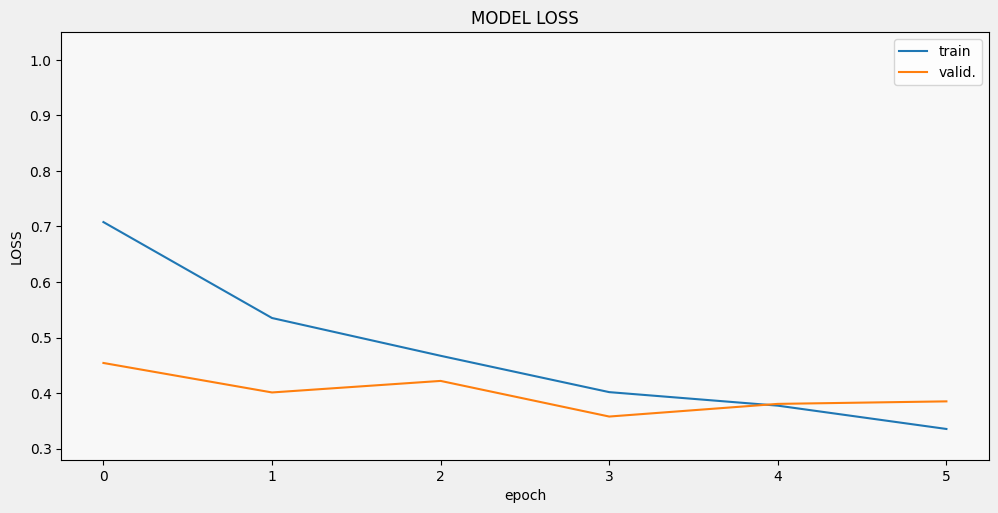

In [32]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])


display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)


/tmp/ipykernel_34/494254271.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


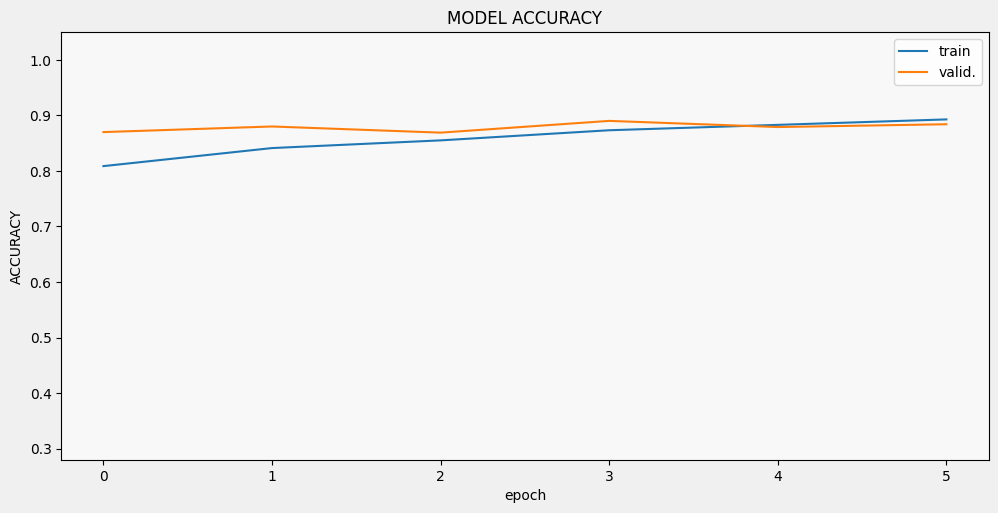

In [33]:

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    211,
)




In [35]:
pred=model.predict(test_generator)

324/324 [==============================] - 111s 340ms/step


In [36]:
df_submission = pd.read_csv('/kaggle/input/dog-breed-identification-data/sample_submission.csv')
df_submission.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e       0.008333      0.008333   
1  00102ee9d8eb90812350685311fe5890       0.008333      0.008333   
2  0012a730dfa437f5f3613fb75efcd4ce       0.008333      0.008333   
3  001510bc8570bbeee98c8d80c8a95ec1       0.008333      0.008333   
4  001a5f3114548acdefa3d4da05474c2e       0.008333      0.008333   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.008333  0.008333                        0.008333     0.008333   
1             0.008333  0.008333                        0.008333     0.008333   
2             0.008333  0.008333                        0.008333     0.008333   
3             0.008333  0.008333                        0.008333     0.008333   
4             0.008333  0.008333                        0.008333     0.008333   

   australian_terrier   basenji    basset  ...  toy_poodle  toy_terrier  \
0            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
1            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
2            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
3            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
4            0.008333  0.008333  0.008333  ...    0.008333     0.008333   

     vizsla  walker_hound  weimaraner  welsh_springer_spaniel  \
0  0.008333      0.008333    0.008333                0.008333   
1  0.008333      0.008333    0.008333                0.008333   
2  0.008333      0.008333    0.008333                0.008333   
3  0.008333      0.008333    0.008333                0.008333   
4  0.008333      0.008333    0.008333                0.008333   

   west_highland_white_terrier   whippet  wire-haired_fox_terrier  \
0                     0.008333  0.008333                 0.008333   
1                     0.008333  0.008333                 0.008333   
2                     0.008333  0.008333                 0.008333   
3                     0.008333  0.008333                 0.008333   
4                     0.008333  0.008333                 0.008333   

   yorkshire_terrier  
0           0.008333  
1           0.008333  
2           0.008333  
3           0.008333  
4           0.008333  

[5 rows x 121 columns]

In [39]:
file_list = test_generator.filenames
id_list = []
for name in file_list:
    m = re.sub('test/', '', name)
    m = re.sub('.jpg', '', m)
    id_list.append(m)

In [38]:
df_submission['id'] = id_list
df_submission.iloc[:,1:] = pred
df_submission.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   6.633176e-07  5.539072e-07   
1  00102ee9d8eb90812350685311fe5890   5.531424e-07  3.293270e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   2.449933e-05  1.849698e-03   
3  001510bc8570bbeee98c8d80c8a95ec1   1.540361e-05  1.650698e-05   
4  001a5f3114548acdefa3d4da05474c2e   7.571723e-03  1.733393e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         4.484049e-08  2.526644e-07                    1.337650e-08   
1         2.131371e-07  1.534685e-06                    1.729063e-05   
2         3.913802e-05  2.543624e-05                    1.137801e-05   
3         6.038849e-07  1.074955e-06                    5.587084e-05   
4         2.012443e-05  3.022842e-07                    8.589513e-06   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  6.930106e-08        1.002003e-08  4.203147e-07  1.779408e-08  ...   
1  1.460389e-05        1.183968e-06  2.053430e-06  2.555459e-06  ...   
2  3.524121e-05        1.761667e-06  3.416968e-06  2.444801e-05  ...   
3  1.408780e-05        3.046730e-06  7.019722e-06  1.514657e-05  ...   
4  1.070581e-05        2.038714e-06  1.028693e-05  9.450961e-06  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.241554e-07  3.819578e-07  2.466550e-07  8.528404e-08  8.608698e-08   
1  1.215847e-06  2.330207e-06  8.750628e-07  4.546115e-06  8.146065e-07   
2  8.663097e-06  4.288072e-05  6.647505e-06  2.160098e-04  3.472894e-05   
3  2.333087e-05  5.627809e-06  1.447636e-06  1.248451e-04  1.016847e-06   
4  4.958986e-05  2.879296e-05  8.174836e-06  1.811725e-05  5.200898e-06   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            9.824917e-08                 2.334941e-07  2.328629e-08   
1            1.231330e-06                 4.570194e-04  1.589753e-06   
2            4.119162e-04                 1.157643e-05  9.517786e-05   
3            9.368735e-06                 9.240077e-07  3.123348e-06   
4            8.304133e-06                 7.882413e-06  2.418365e-06   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.180484e-06       2.958849e-07  
1             9.410176e-07       1.825454e-06  
2             3.524531e-05       1.838853e-05  
3             4.875367e-07       4.994150e-05  
4             4.468243e-05       5.761523e-04  

[5 rows x 121 columns]

In [40]:
final_sub = df_submission.set_index('id')
final_sub.to_csv('Submission.csv')

In [ ]:
from IPython.display import FileLink

# Replace 'my_trained_model.h5' with your actual model file name
output_path = r'/kaggle/working/Submission.csv'

# Create a download link
FileLink(r'./' + output_path.split('/')[-1])

# #model not saving quite right

In [24]:
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.preprocessing import image
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Dropout,Conv2D,GlobalAveragePooling2D,Flatten
from keras.models import load_model
import pandas as pd
import numpy as np

In [5]:
labels = pd.read_csv('/kaggle/input/dog-breed-identification-data/labels.csv')

In [6]:
labels.head()


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [8]:
def jpg(id):
    return id+".jpg"

In [9]:
labels["id"] = labels["id"].apply(jpg)

In [12]:
data_generator = Imgen(preprocessing_function = keras.applications.nasnet.preprocess_input,
                      shear_range = 0.2,
                      horizontal_flip = True,
                      validation_split = 0.2,
                      vertical_flip=True,
                      zoom_range=0.2
                     )



In [13]:
train = data_generator.flow_from_dataframe(
labels,
directory = '/kaggle/input/dog-breed-identification-data/train',
x_col = 'id',
y_col = 'breed',
subset = 'training',
color_mode = 'rgb',
class_mode = 'categorical',
target_size = (331,331),
batch_size = 32,
shuffle =True,
seed = 100)

val_ds = data_generator.flow_from_dataframe(
labels,
directory = '/kaggle/input/dog-breed-identification-data/train',
x_col = 'id',
y_col = 'breed',
subset = 'validation',
color_mode = 'rgb',
class_mode = 'categorical',
target_size = (331,331),
batch_size = 32,
shuffle =True,
seed = 100)

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [14]:
names = train.class_indices

In [18]:
names

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [15]:
class_names = [k for k,v in names.items()]

In [17]:
class_names

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [19]:
x,y = next(train)
print(y.shape)
print(x.shape)

(32, 120)
(32, 331, 331, 3)


In [20]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [29]:
def plot(images,labels):
    plt.figure(figsize = [20,15])
    for i in range(25):
        plt.subplot(5,6,i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')



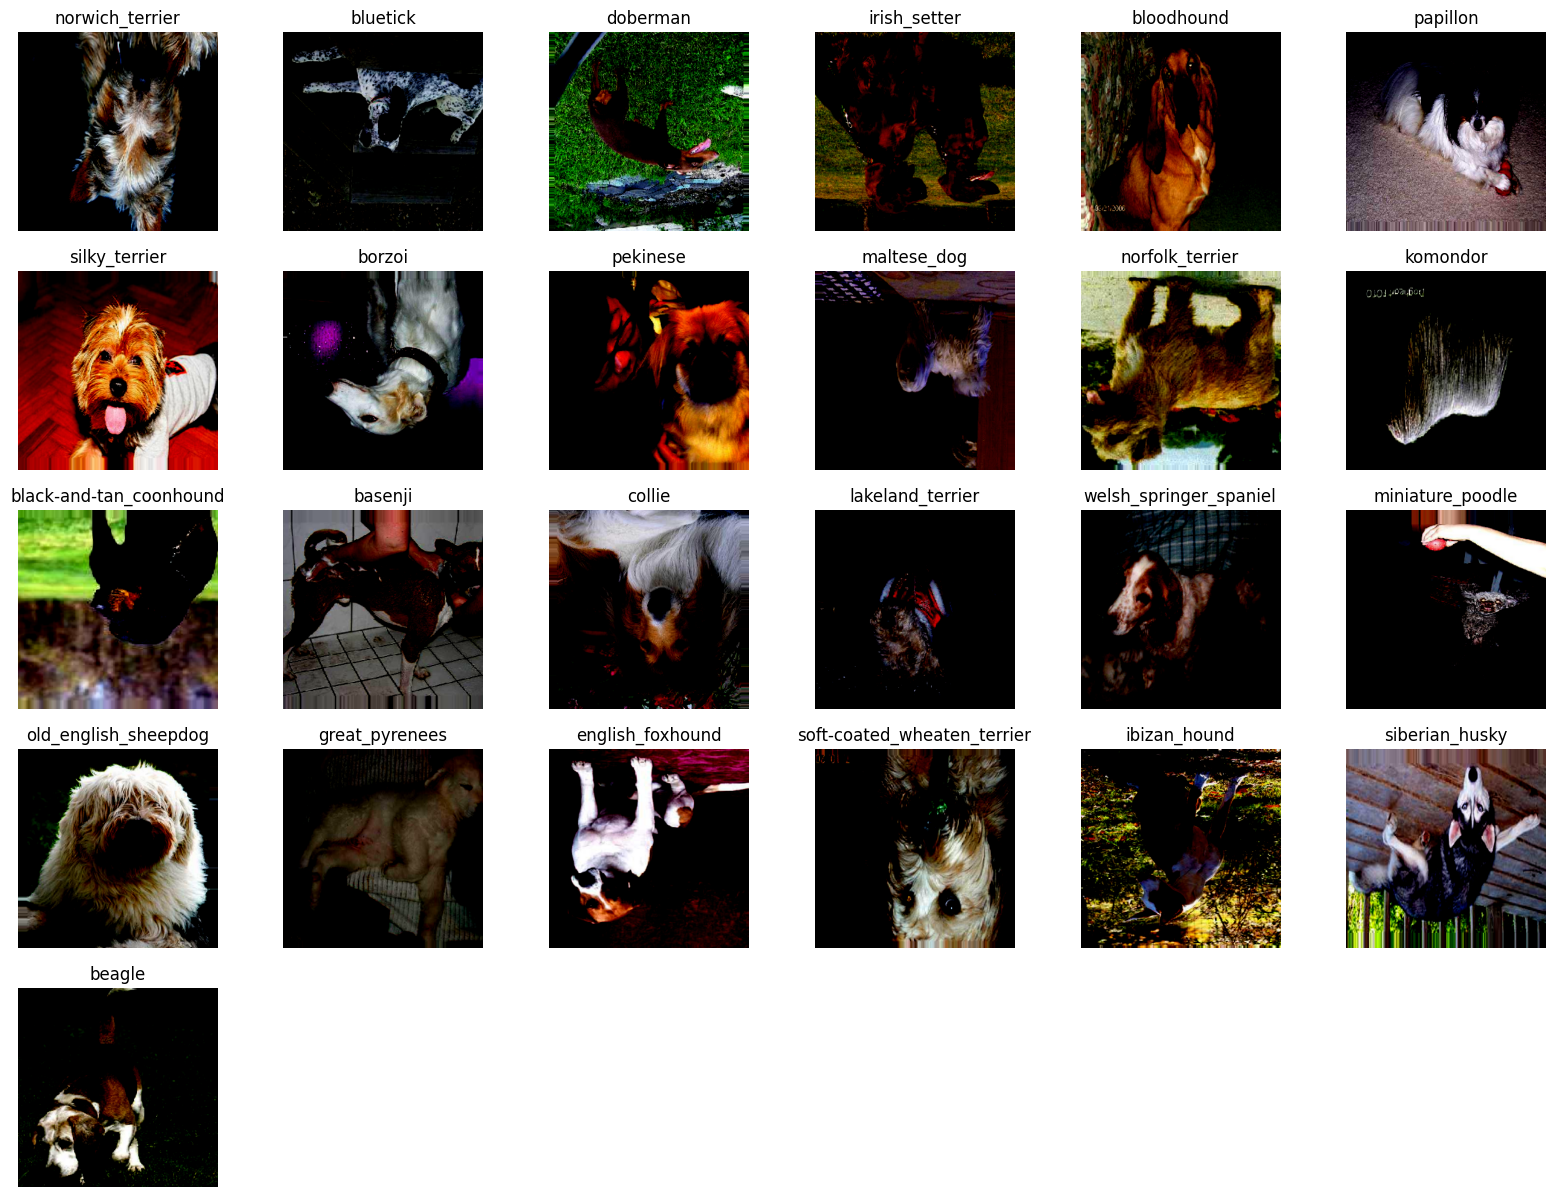

In [30]:
plot(x,y)

In [31]:
base_model = InceptionResNetV2(include_top = False,
                                   weights ='imagenet',
                                  input_shape = (331,331,3)
                                  )
base_model.trainable = False



219055592/219055592 [==============================] - 7s 0us/step


In [33]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(120,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 9, 9, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               30840     
                                                                 
Total params: 54761048 (208.90 MB)
Trainable params: 4

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [35]:
callback = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
           keras.callbacks.ModelCheckpoint("DogBreedModel.h5",save_best_only =True,verbose =2)]

In [36]:
history = model.fit(train,epochs = 20,validation_data = val_ds,callbacks = callback)

Epoch 1/20


I0000 00:00:1708497449.481458     220 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


256/256 [==============================] - ETA: 0s - loss: 3.0998 - accuracy: 0.3821
Epoch 1: val_loss improved from inf to 1.43104, saving model to DogBreedModel.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/256 [==============================] - 287s 1s/step - loss: 3.0998 - accuracy: 0.3821 - val_loss: 1.4310 - val_accuracy: 0.6502
Epoch 2/20
256/256 [==============================] - ETA: 0s - loss: 1.5918 - accuracy: 0.6215
Epoch 2: val_loss improved from 1.43104 to 1.15573, saving model to DogBreedModel.h5
256/256 [==============================] - 235s 920ms/step - loss: 1.5918 - accuracy: 0.6215 - val_loss: 1.1557 - val_accuracy: 0.6967
Epoch 3/20
256/256 [==============================] - ETA: 0s - loss: 1.3721 - accuracy: 0.6546
Epoch 3: val_loss improved from 1.15573 to 1.09886, saving model to DogBreedModel.h5
256/256 [==============================] - 240s 938ms/step - loss: 1.3721 - accuracy: 0.6546 - val_loss: 1.0989 - val_accuracy: 0.6923
Epoch 4/20
256/256 [==============================] - ETA: 0s - loss: 1.3004 - accuracy: 0.6620
Epoch 4: val_loss improved from 1.09886 to 1.03015, saving model to DogBreedModel.h5
256/256 [==============================] - 235s 918ms/s

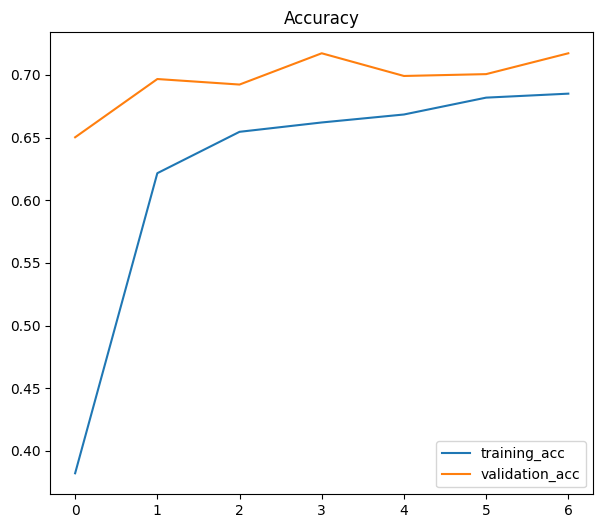

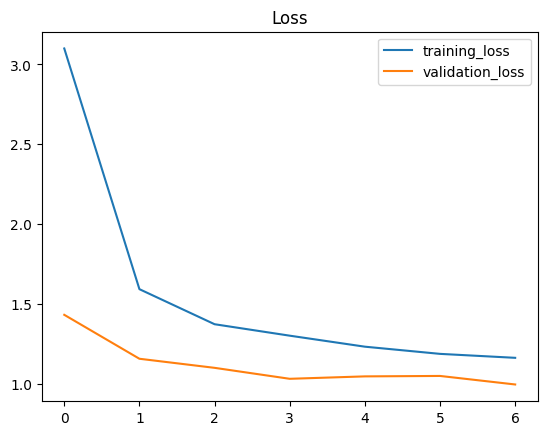

In [37]:
plt.figure(figsize=(7,6))
plt.plot(history.epoch,history.history['accuracy'],label ="training_acc")
plt.plot(history.epoch,history.history['val_accuracy'],label ="validation_acc")
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.epoch,history.history["loss"],label = "training_loss")
plt.plot(history.epoch,history.history["val_loss"],label = "validation_loss")
plt.title("Loss")
plt.legend()
plt.show()

In [38]:
from IPython.display import FileLink

# Replace 'my_trained_model.h5' with your actual model file name
output_path = r'/kaggle/working/DogBreedModel.h5'

# Create a download link
FileLink(r'./' + output_path.split('/')[-1])

/kaggle/working/DogBreedModel.h5

In [39]:
model = load_model("/kaggle/working/DogBreedModel.h5")

ValueError: Unknown layer: 'CustomScaleLayer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

# old one

In [ ]:
model = load_model("/kaggle/working/MyModel.h5")

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

2024-02-21 05:21:53.100721: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 05:21:53.100813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 05:21:53.339876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:

# Set constants
input_dir = '/kaggle/input/dog-breed-identification-data'  # Update with your actual path
image_dir = os.path.join(input_dir, 'train')
labels_path = os.path.join(input_dir, 'labels.csv')




In [7]:
labels_df = pd.read_csv(labels_path)
breed_labels = labels_df['breed']
num_classes = len(breed_labels.unique())
train_df, valid_df = train_test_split(labels_df, test_size=0.2, random_state=42)
train_df['id'] = train_df['id'].astype(str) + '.jpg'
valid_df['id'] = valid_df['id'].astype(str) + '.jpg'


In [9]:

# Data augmentation for training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   horizontal_flip=True)

# Data rescaling for validation set
valid_datagen = ImageDataGenerator(rescale=1./255,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   horizontal_flip=True)

# Load and preprocess images for training set
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                     directory=image_dir,
                                                     x_col="id",
                                                     y_col="breed",
                                                     target_size=(299, 299),  # Updated resolution
                                                     batch_size=32,
                                                     class_mode='categorical')

# Load and preprocess images for validation set
valid_generator = valid_datagen.flow_from_dataframe(dataframe=valid_df,
                                                     directory=image_dir,
                                                     x_col="id",
                                                     y_col="breed",
                                                     target_size=(299, 299),  # Updated resolution
                                                     batch_size=32,
                                                     class_mode='categorical')

# Create a pre-trained ResNet50V2 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


# Add custom layers for classification
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Added dropout layer
model.add(BatchNormalization())  # Added batch normalization layer
model.add(Dense(256, activation='relu'))  # Additional dense layer
model.add(Dense(num_classes, activation='softmax'))

# Fine-tune the last 10 layers of the pre-trained model
for layer in base_model.layers[:-20]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model with fine-tuning and early stopping
history = model.fit(train_generator, epochs=30, validation_data=valid_generator, callbacks=[early_stopping])

# Save the model for later use
model.save('/kaggle/working/dog_breed_classifier_inception_finetuned.h5')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Found 8177 validated image filenames belonging to 120 classes.
Found 2045 validated image filenames belonging to 120 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/30


I0000 00:00:1708493108.423807     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


256/256 [==============================] - 337s 1s/step - loss: 4.1578 - accuracy: 0.1394 - val_loss: 2.8540 - val_accuracy: 0.4020
Epoch 2/30
256/256 [==============================] - 216s 843ms/step - loss: 2.6563 - accuracy: 0.4168 - val_loss: 1.7246 - val_accuracy: 0.5809
Epoch 3/30
256/256 [==============================] - 215s 837ms/step - loss: 1.8979 - accuracy: 0.5502 - val_loss: 1.3674 - val_accuracy: 0.6406
Epoch 4/30
256/256 [==============================] - 215s 840ms/step - loss: 1.5279 - accuracy: 0.6098 - val_loss: 1.3316 - val_accuracy: 0.6455
Epoch 5/30
256/256 [==============================] - 217s 846ms/step - loss: 1.2882 - accuracy: 0.6559 - val_loss: 1.3125 - val_accuracy: 0.6445
Epoch 6/30
256/256 [==============================] - 217s 846ms/step - loss: 1.1492 - accuracy: 0.6911 - val_loss: 1.2448 - val_accuracy: 0.6680
Epoch 7/30
256/256 [==============================] - 217s 847ms/step - loss: 1.0098 - accuracy: 0.7223 - val_loss: 1.3107 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
from IPython.display import FileLink

# Replace 'my_trained_model.h5' with your actual model file name
model_link = FileLink(r'/kaggle/working/dog_breed_classifier_resnet_finetuned.h5')
model_link


In [ ]:
from IPython.display import FileLink

# Replace 'my_trained_model.h5' with your actual model file name
output_path = r'/kaggle/working/dog_breed_classifier_resnet_finetuned.h5'

# Create a download link
FileLink(r'./' + output_path.split('/')[-1])
